In [2]:
import seml
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
import utils
import numpy as np
import os

In [85]:
import scanpy as sc
fig_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/process_seml'
sc.settings.figdir = fig_path

In [50]:
results = seml.get_results('atac_atac_prediction_counts', to_data_frame=True,  fields=["config", "config_hash", "result"],)

  0%|          | 0/209 [00:00<?, ?it/s]

  0%|          | 0/209 [00:00<?, ?it/s]

In [53]:
results['config.data.batch'][results['config.data.batch'].apply(isinstance,args = [list])] = 'all'
results['config.data.batch'][results['config.data.batch'].isna()] = 'hematopoiesis'

In [105]:
neurips = results[results['config.data.batch'] != 'hematopoiesis']

In [92]:
def plot_eval(data, x, y, hue, hue_order=None, save=None):
    fig, ax = plt.subplots(figsize = (15, 8))
    sns.barplot(data = data, x=x, y=y, hue=hue, hue_order = hue_order, ci = "sd", ax = ax, order = np.sort(neurips[x].unique()))
    plt.legend(loc='lower left')
    plt.xlabel(x.split(".")[-1])
    plt.ylabel(y.split(".")[-1])
    
    if save:
        plt.savefig(os.path.join(save, f'{y.split(".")[-1]}_{x.split(".")[-1]}_{"_".join(hue_order)}.pdf'))
    

## Only ATAC to ATAC

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


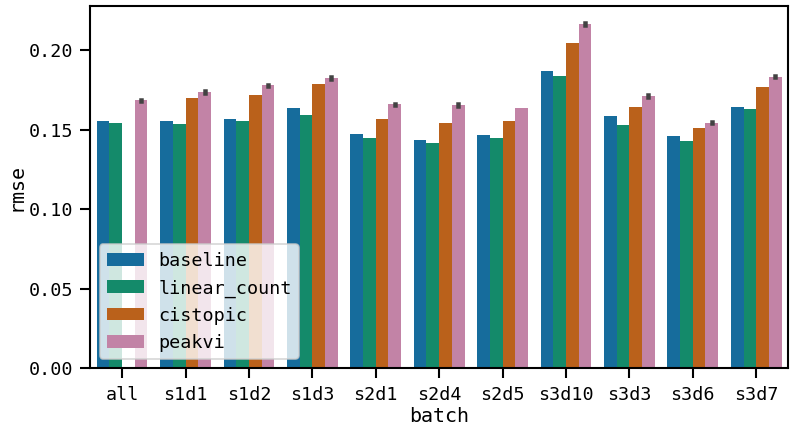

In [106]:
plot_eval(data=neurips, x='config.data.batch', y='result.rmse', hue='config.model.model_type', hue_order = ["baseline", "linear_count",  "cistopic","peakvi"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


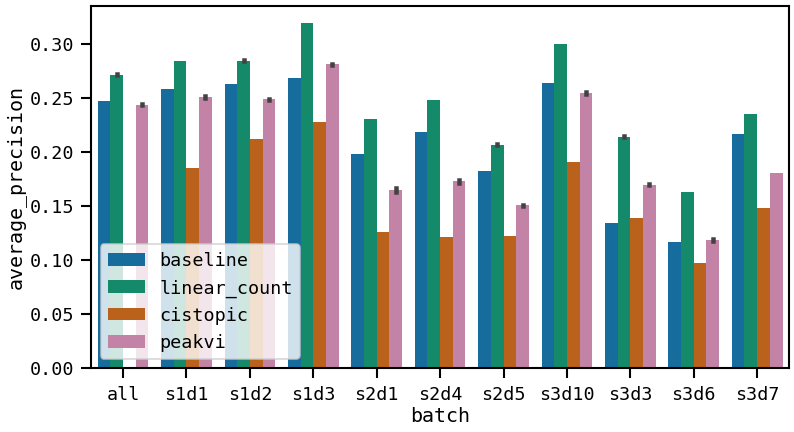

In [95]:
plot_eval(data=neurips, x='config.data.batch', y='result.average_precision', hue='config.model.model_type', hue_order = ["baseline", "linear_count",  "cistopic","peakvi"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


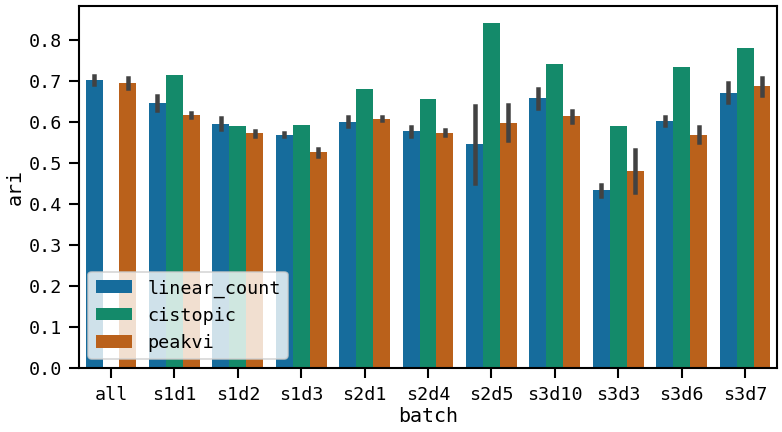

In [96]:
plot_eval(data=neurips, x='config.data.batch', y='result.ari', hue='config.model.model_type', hue_order = [ "linear_count",  "cistopic","peakvi"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


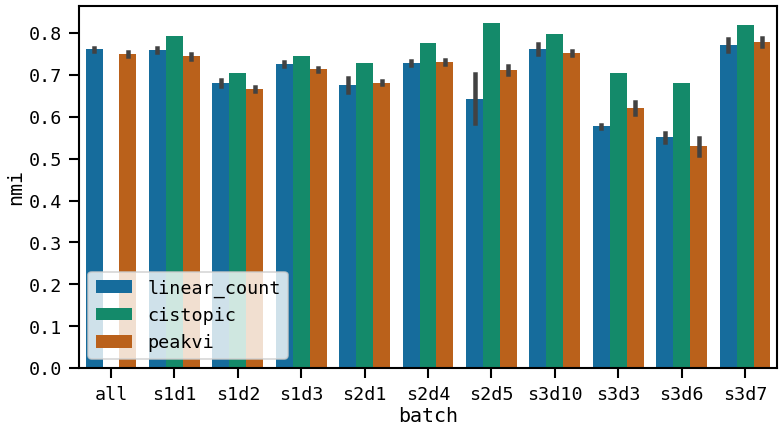

In [97]:
plot_eval(data=neurips, x='config.data.batch', y='result.nmi', hue='config.model.model_type', hue_order = [ "linear_count",  "cistopic","peakvi"], save = fig_path)

## Including RNA to ATAC

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


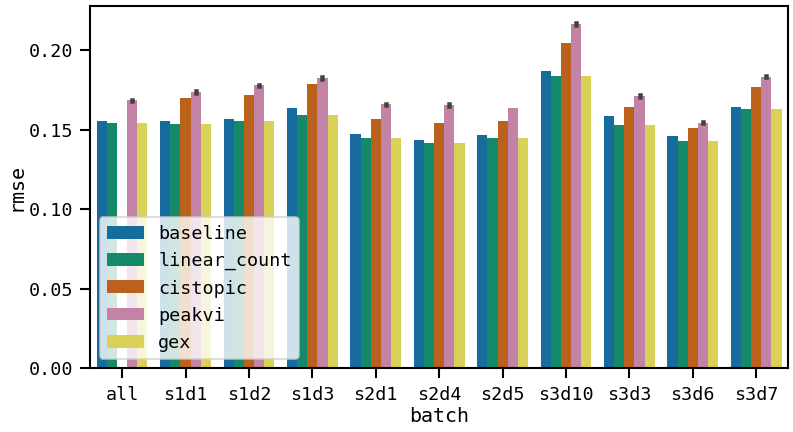

In [99]:
plot_eval(data=neurips, x='config.data.batch', y='result.rmse', hue='config.model.model_type', hue_order = ["baseline", "linear_count",  "cistopic","peakvi", "gex"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


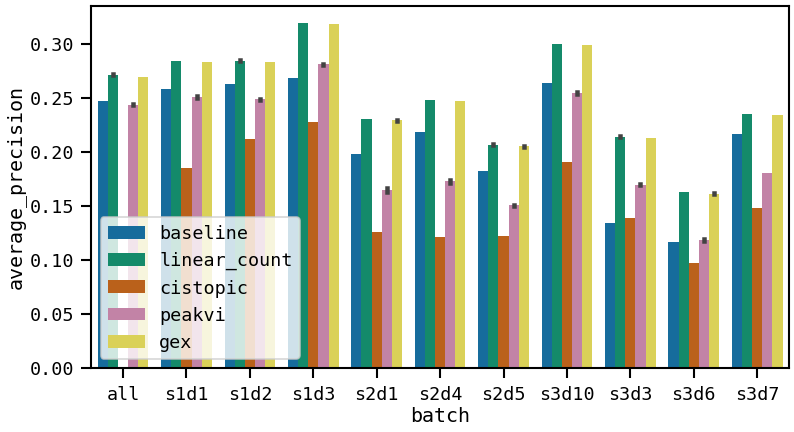

In [100]:
plot_eval(data=neurips, x='config.data.batch', y='result.average_precision', hue='config.model.model_type', hue_order = ["baseline", "linear_count",  "cistopic","peakvi", "gex"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


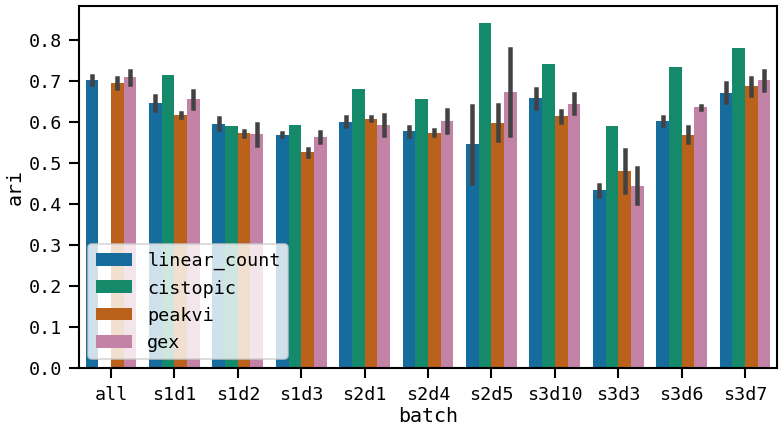

In [101]:
plot_eval(data=neurips, x='config.data.batch', y='result.ari', hue='config.model.model_type', hue_order = [ "linear_count",  "cistopic","peakvi", "gex"], save = fig_path)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


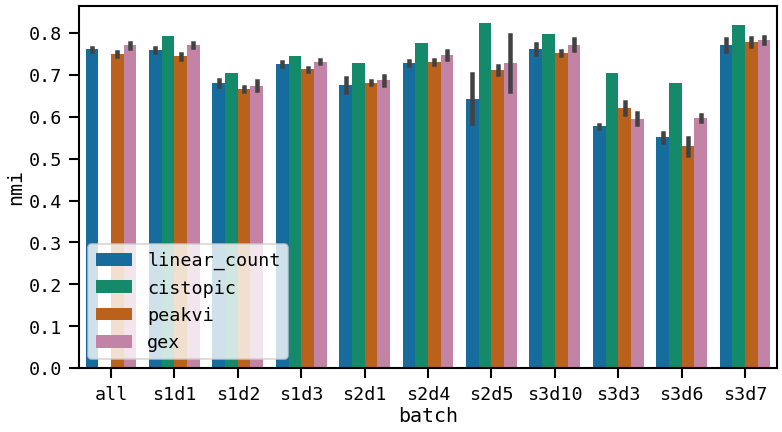

In [102]:
plot_eval(data=neurips, x='config.data.batch', y='result.nmi', hue='config.model.model_type', hue_order = [ "linear_count",  "cistopic","peakvi", "gex"], save = fig_path)

## Hematopoeisis

## Plot best embedding

In [107]:
from utils import plot_embedding

In [112]:
results[(results['config.model.model_type'] == 'linear_count') & (results['config.data.batch'] == 's1d1')]

,_id,config_hash,config.overwrite,config.db_collection,config.data.batch,config.data.dataset,config.model.model_type,config.optimization.regularization.learning_rate,config.optimization.regularization.weight_decay,config.setup.batch_key,...,result.embedding,result.average_precision,result.rmse,result.bce,result.nmi,result.ari,result.model_path,config.setup.model_params.n_latent,config.setup.model_params.n_hidden,config.setup.model_params.use_layer_norm
24,25,876bbef157cf873bf92d854e56163fe3,25,atac_atac_prediction_counts,s1d1,neurips,peakvi,0.0001,0.001,batch,...,0 NMI_cluste...,0.250782,0.174354,13066.966192,0.734979,0.612948,/storage/groups/ml01/workspace/laura.martens/a...,NaN,NaN,NaN
27,28,44ac13d61756a7ccf192b06da99f8651,28,atac_atac_prediction_counts,s1d1,neurips,peakvi,0.0001,0.001,batch,...,0 NMI_cluste...,0.249141,0.173334,12925.546263,0.741287,0.621744,/storage/groups/ml01/workspace/laura.martens/a...,50.0,NaN,NaN
30,31,e43b11e833d8bf31d45c20fb6aba1170,31,atac_atac_prediction_counts,s1d1,neurips,peakvi,0.0001,0.001,batch,...,0 NMI_cluste...,0.250453,0.173979,13001.564057,0.753100,0.613613,/storage/groups/ml01/workspace/laura.martens/a...,80.0,NaN,NaN
33,34,3c624bf8bd20db5ba6e859bc1bb21796,34,atac_atac_prediction_counts,s1d1,neurips,peakvi,0.0001,0.001,batch,...,0 NMI_cluste...,0.249498,0.173313,12914.756228,0.745334,0.611571,/storage/groups/ml01/workspace/laura.martens/a...,130.0,NaN,NaN
36,37,96c26ef84c764d04e2690bd4d27e9048,37,atac_atac_prediction_counts,s1d1,neurips,peakvi,0.0001,0.001,batch,...,0 NMI_cluste...,0.251736,0.172543,12817.460854,0.746731,0.623994,/storage/groups/ml01/workspace/laura.martens/a...,200.0,NaN,NaN


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment
LinearCountVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=150, bias=True)
          (1): None
          (2): LayerNorm((150,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=150, out_features=150, bias=True)
          (1): None
          (2): LayerNorm((150,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=150, out_features=80, bias=True)
    (var_encoder): Linear(in_features=150, out_features=80, bias=True)
  )
  (decoder): LinearDecoderSCVI(
    (factor_regressor): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Li

  0%|          | 0/1 [00:01<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

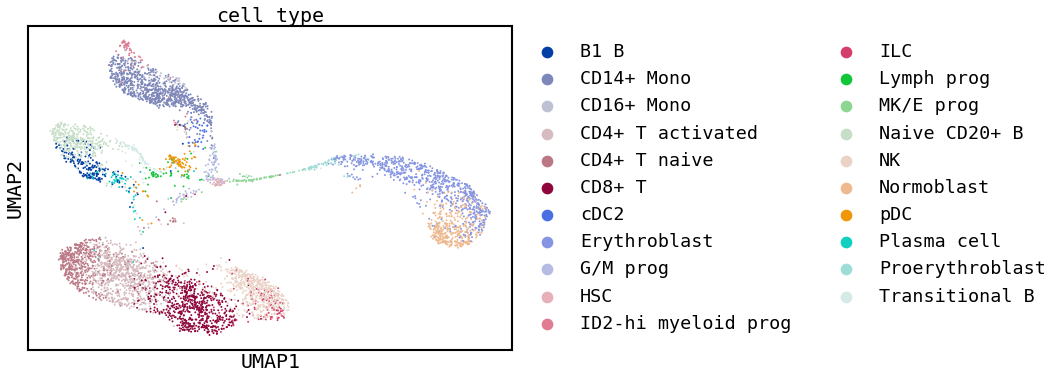

In [113]:
adata = plot_embedding('atac_atac_prediction_counts', "e1c03c82c0c62e4b8ca20bd0beb70100")

In [8]:
adata = plot_embedding('atac_atac_prediction_counts', "e1c03c82c0c62e4b8ca20bd0beb70100")

AnnData object with n_obs × n_vars = 5616 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch', 'pseudotime_order_GEX', 'is_train', '_scvi_batch', '_scvi_labels'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism', 'sample_pm_varnames', '_scvi_uuid', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment
PEAKVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=341, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=80, bias=True)
    (var_encoder): Linear(in_features=341, out_features=80, bias=True)
  )
  (z_decoder): Decoder(
    (px_decoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=80, 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

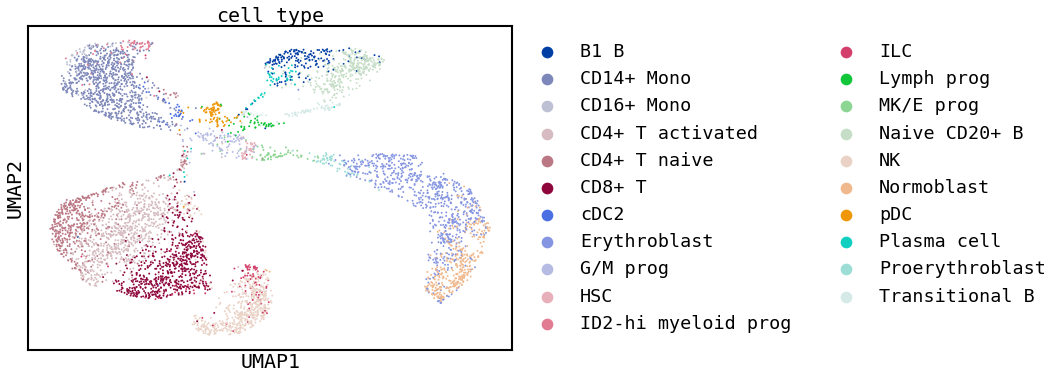

In [115]:
adata = plot_embedding('atac_atac_prediction_counts', "e43b11e833d8bf31d45c20fb6aba1170")